## Análise das vendas de empresa

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

### Importação dos dados para um dataframe

In [4]:
dadosAracaju = pd.read_excel('Aracaju.xlsx')

In [5]:
dadosSalvador = pd.read_excel('Salvador.xlsx')

In [6]:
dadosNatal = pd.read_excel('Natal.xlsx')

In [7]:
dadosRecife = pd.read_excel('Recife.xlsx')

In [8]:
dadosFortaleza = pd.read_excel('Fortaleza.xlsx')

### Juntando todos os dados em um dataframe

In [9]:
total = pd.concat([dadosAracaju, dadosRecife, dadosSalvador, dadosNatal, dadosFortaleza])

In [10]:
total.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
78,Fortaleza,2019-01-01,37.66,1005,2
93,Salvador,2019-01-01,15.58,1037,1
172,Salvador,2019-01-02,6.70,1035,1
101,Natal,2019-01-02,32.28,1035,3
21,Aracaju,2018-01-01,37.36,1520,2
184,Natal,2019-01-02,167.16,1037,1
20,Recife,2019-01-01,42.35,982,3
58,Fortaleza,2019-01-01,38.90,1004,4
179,Natal,2019-01-02,64.95,1036,1
35,Natal,2018-01-18,552.00,852,2


In [11]:
total.rename(columns={'Vendas':'Valor'}, inplace=True)

### Verificando os tipos de dados após importação

In [12]:
total.dtypes

Cidade            object
Data      datetime64[ns]
Valor            float64
LojaID             int64
Qtde               int64
dtype: object

### Verificando se há dados nulos no dataframe

In [13]:
total.isna().sum()

Cidade    0
Data      0
Valor     0
LojaID    0
Qtde      0
dtype: int64

In [14]:
total.count()

Cidade    894
Data      894
Valor     894
LojaID    894
Qtde      894
dtype: int64

In [15]:
total.describe()

,Valor,LojaID,Qtde
count,894.000000,894.000000,894.000000
mean,122.611801,1074.844519,3.261745
std,166.818723,191.360735,2.096964
min,3.010000,852.000000,1.000000
25%,22.380000,983.000000,2.000000
50%,44.000000,1035.000000,3.000000
75%,160.925000,1037.000000,4.000000
max,886.000000,1523.000000,10.000000


In [16]:
# Convertendo os id's das lojas para um valor não numerico
total['LojaID'] = total['LojaID'].astype("object") 

In [17]:
total.dtypes

Cidade            object
Data      datetime64[ns]
Valor            float64
LojaID            object
Qtde               int64
dtype: object

### Calculando o total de cada venda (valor * quantidade)

In [91]:
# Criando uma nova coluna com o valor total de cada venda
total['Valor_total'] = total['Valor'] * total['Qtde']

In [92]:
total.head(3)

,Cidade,Data,Valor,LojaID,Qtde,Valor_total
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55


### Totalizações por agrupamento

In [291]:
# Faturametno por mes/cidade
valorPorMes = total.groupby([total.Data.dt.month, 'Cidade'])['Valor_total'].sum()
valorPorMes

Data  Cidade   
1     Aracaju      48748.25
      Fortaleza    23803.60
      Natal        46307.52
      Recife       36814.11
      Salvador     32783.02
2     Fortaleza     1464.89
      Natal        31469.00
      Recife        2476.92
      Salvador      1833.66
3     Fortaleza    12645.48
      Natal        36523.00
      Recife       12645.48
      Salvador      5980.05
4     Natal        13586.00
5     Natal         8965.00
6     Natal         7097.00
7     Natal         4462.00
8     Natal         1212.00
9     Natal         5984.00
10    Natal         9680.00
11    Natal         1126.00
12    Natal          816.00
Name: Valor_total, dtype: float64

### Verificou-se que  algumas cidades não têm todos os meses do ano, portanto, decidiu-se limitar a analise aos meses janeiro, fevereiro e março

In [297]:
novoTotal = total[total.Data.dt.month.isin([1, 2, 3])]
novoTotal.Data.dt.month.unique()

array([1, 2, 3], dtype=int64)

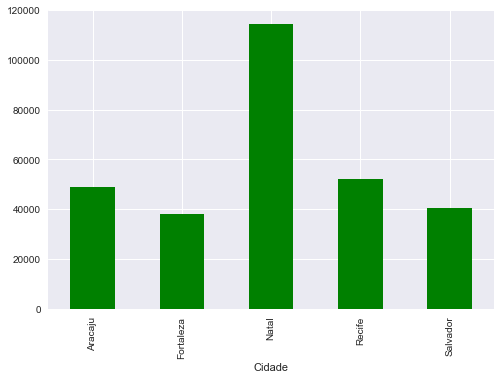

In [298]:
# Cidades mais lucrativas
lucroPorCidade = novoTotal.groupby('Cidade')['Valor_total'].sum().plot.bar(color='green');

In [299]:
# Faturametno por mes/cidade
valorPorMes = novoTotal.groupby([novoTotal.Data.dt.month, 'Cidade'])['Valor_total'].sum()
valorPorMes.sort_index(inplace=True)

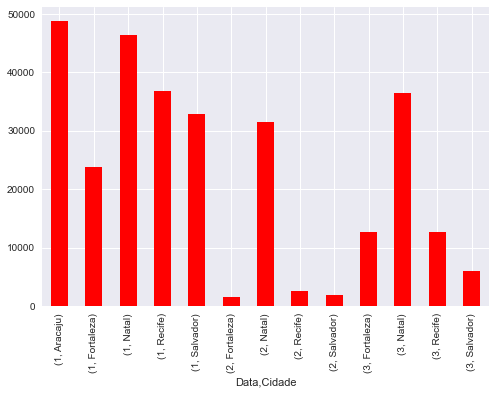

In [300]:
valorPorMes.plot.bar(color='red');

### Analise dos dados da cidade de Natal

In [301]:
# Criando um dataframe apenas com os dados de Natal para um analise mais pontual
dadosNatal = novoTotal.loc[novoTotal.Cidade == 'Natal']
dadosNatal

,Cidade,Data,Valor,LojaID,Qtde,Valor_total
2,Natal,2019-03-11,308.00,852,3,924.00
3,Natal,2019-01-07,271.00,854,3,813.00
4,Natal,2019-03-09,699.00,853,3,2097.00
5,Natal,2019-03-30,674.00,854,2,1348.00
7,Natal,2019-03-18,886.00,853,4,3544.00
...,...,...,...,...,...,...
235,Natal,2019-01-03,41.84,1034,1,41.84
236,Natal,2019-01-03,126.29,1035,3,378.87
237,Natal,2019-01-03,38.06,1036,3,114.18
238,Natal,2019-01-03,139.64,1035,1,139.64


In [306]:
# Total do faturamento das lojas localizadas em Natal. 
dadosNatal.groupby('LojaID')['Valor'].sum().sort_values()

LojaID
1034     1495.72
1037     3181.89
1035     3380.21
1036     4344.94
852      9022.00
853      9095.00
854     11839.00
Name: Valor, dtype: float64

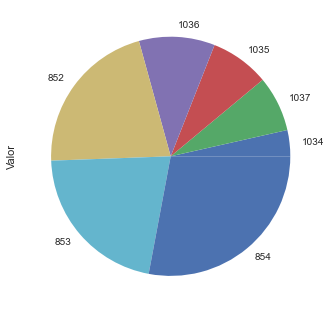

In [328]:
dadosNatal.groupby('LojaID')['Valor'].sum().sort_values().plot.pie();

In [309]:
#Filtrando os dados da loja 854 (Natal)
loja854 = dadosNatal.loc[dadosNatal.LojaID==854]
loja854

,Cidade,Data,Valor,LojaID,Qtde,Valor_total
3,Natal,2019-01-07,271.0,854,3,813.0
5,Natal,2019-03-30,674.0,854,2,1348.0
15,Natal,2018-02-01,432.0,854,3,1296.0
17,Natal,2018-02-18,276.0,854,3,828.0
19,Natal,2019-03-31,282.0,854,2,564.0
23,Natal,2019-02-14,304.0,854,3,912.0
29,Natal,2019-03-09,646.0,854,2,1292.0
32,Natal,2019-03-17,244.0,854,2,488.0
33,Natal,2018-01-11,759.0,854,2,1518.0
39,Natal,2019-01-10,504.0,854,3,1512.0


In [324]:
#Segunda= 0 /.../ Domingo = 6
# Os dados mostram que o dia de maior media de venda é a quarta )
loja854.groupby(loja854.Data.dt.weekday)['Valor_total'].mean()

Data
0     813.000000
1    2499.500000
2    2520.000000
3    1710.571429
4    1296.000000
5    1754.800000
6     897.800000
Name: Valor_total, dtype: float64

In [349]:
# Os dados mostram que o 10 dias de maior venda na loja 854
loja854.groupby(loja854.Data)['Valor_total'].sum().sort_values(ascending=False).head(10)

Data
2019-02-14    5044.0
2019-01-08    3436.0
2018-02-10    3172.0
2019-03-30    2760.0
2019-03-07    2604.0
2019-03-20    2520.0
2019-02-24    1700.0
2018-03-13    1563.0
2019-03-02    1550.0
2018-01-11    1518.0
Name: Valor_total, dtype: float64